# Support Vector Machine

## Classifying Points into Two Classes using SVM
### Consider the following dataset where points are labeled as either Class 0 or Class 1 based on their coordinates. Build an SVM to classify new points into Class 0 or Class 1.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# Dataset
X = np.array([[1, 2], [2, 3], [3, 3], [4, 4],  # Class 0
              [7, 8], [8, 9], [9, 9], [10, 10]])  # Class 1
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])  # Labels

In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Create SVM model with a linear kernel
svm_model = SVC(kernel='linear', C=1.0)

In [ ]:
# Train the model
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Make predictions
y_pred = svm_model.predict(X_test)

In [ ]:
# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


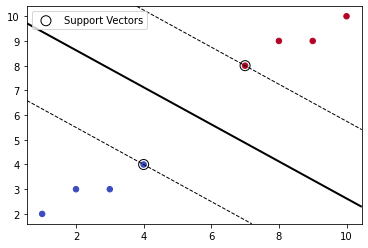

In [ ]:
# Plot the decision boundary
def plot_decision_boundary(X, y, model):
    # Plot points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)

    # Get axis limits
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate the model
    xx, yy = np.meshgrid(
        np.linspace(xlim[0], xlim[1], 50),
        np.linspace(ylim[0], ylim[1], 50)
    )
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')  # Decision boundary
    plt.contour(xx, yy, Z, levels=[-1, 1], linewidths=1, linestyles=['--', '--'], colors='k')  # Margins

    # Highlight support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
                facecolors='none', edgecolors='k', label='Support Vectors')

    plt.legend()
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, svm_model)